In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [24]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/Housing.csv')

In [25]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


# **checking for empty cells**

In [26]:
dataset = dataset.fillna(0)

# **Organizing data into a meaningful format**

In [27]:
for i in ['bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']:
  print(f"{i}: {dataset[i].unique()}")

bedrooms: [4 3 5 2 6 1]
bathrooms: [2 4 1 3]
stories: [3 4 2 1]
mainroad: ['yes' 'no']
guestroom: ['no' 'yes']
basement: ['no' 'yes']
hotwaterheating: ['no' 'yes']
airconditioning: ['yes' 'no']
parking: [2 3 0 1]
prefarea: ['yes' 'no']
furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


In [28]:
dataset['mainroad'] = np.where(dataset['mainroad'] == 'yes', 1, 0)
dataset['guestroom'] = np.where(dataset['guestroom'] == 'yes', 1, 0)
dataset['basement'] = np.where(dataset['basement'] == 'yes', 1, 0)
dataset['hotwaterheating'] = np.where(dataset['hotwaterheating'] == 'yes', 1, 0)
dataset['airconditioning'] = np.where(dataset['airconditioning'] == 'yes', 1, 0)
dataset['prefarea'] = np.where(dataset['prefarea'] == 'yes', 1, 0)
dataset['furnishingstatus'] = np.where(dataset['furnishingstatus'] == 'furnished', 2, dataset['furnishingstatus'] == 'semi-furnished')

In [29]:
dataset

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


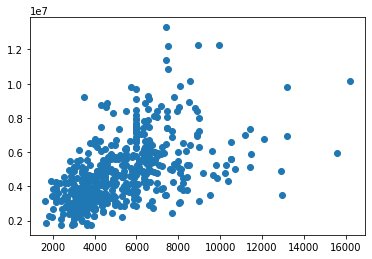

In [30]:
plt.scatter(dataset.area, dataset.price);
plt.show()

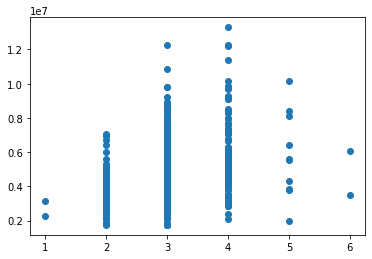

In [31]:
plt.scatter(dataset.bedrooms, dataset.price);
plt.show()

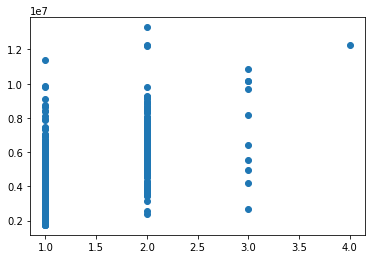

In [32]:
plt.scatter(dataset.bathrooms, dataset.price);
plt.show()

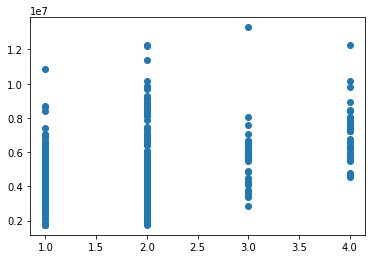

In [33]:
plt.scatter(dataset.stories, dataset.price);
plt.show()

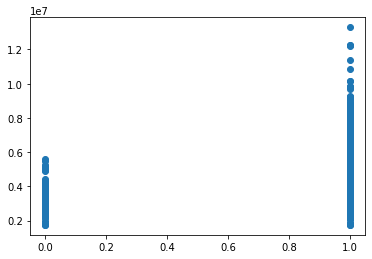

In [34]:
plt.scatter(dataset.mainroad, dataset.price);
plt.show()

In [35]:
Y = dataset.iloc[:, 0]
X = dataset.iloc[:, 1:]
# X.drop("bathrooms", axis=1, inplace=True)

In [36]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [37]:
Y

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [39]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(436, 12)
(436,)
(109, 12)
(109,)


In [40]:
model = LinearRegression(positive=True)
model.fit(np.array(x_train), y_train)

LinearRegression(positive=True)

In [41]:
import pickle
with open('data.pkl', 'wb') as f:
  pickle.dump(model, f)

In [42]:
with open('data.pkl', 'rb') as f:
  loaded_model = pickle.load(f)
model.score(np.array(x_test), y_test)

0.7651474059411918